In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

# Assumptions of Logistic Regression

Note: adjust the path in the following cell to the location where you saved the cleaned data from Chapter 1.

In [2]:
df = pd.read_csv('../Data/Chapter_1_cleaned_data.csv')

Subset column list to features as in Chapter 3

In [3]:
features_response = df.columns.tolist()

In [4]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [6]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                   'PAY_6', 'EDUCATION_CAT', 'graduate school',
                   'high school', 'none','others', 'university']

In [7]:
features_response = [item for item in features_response
                     if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [8]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


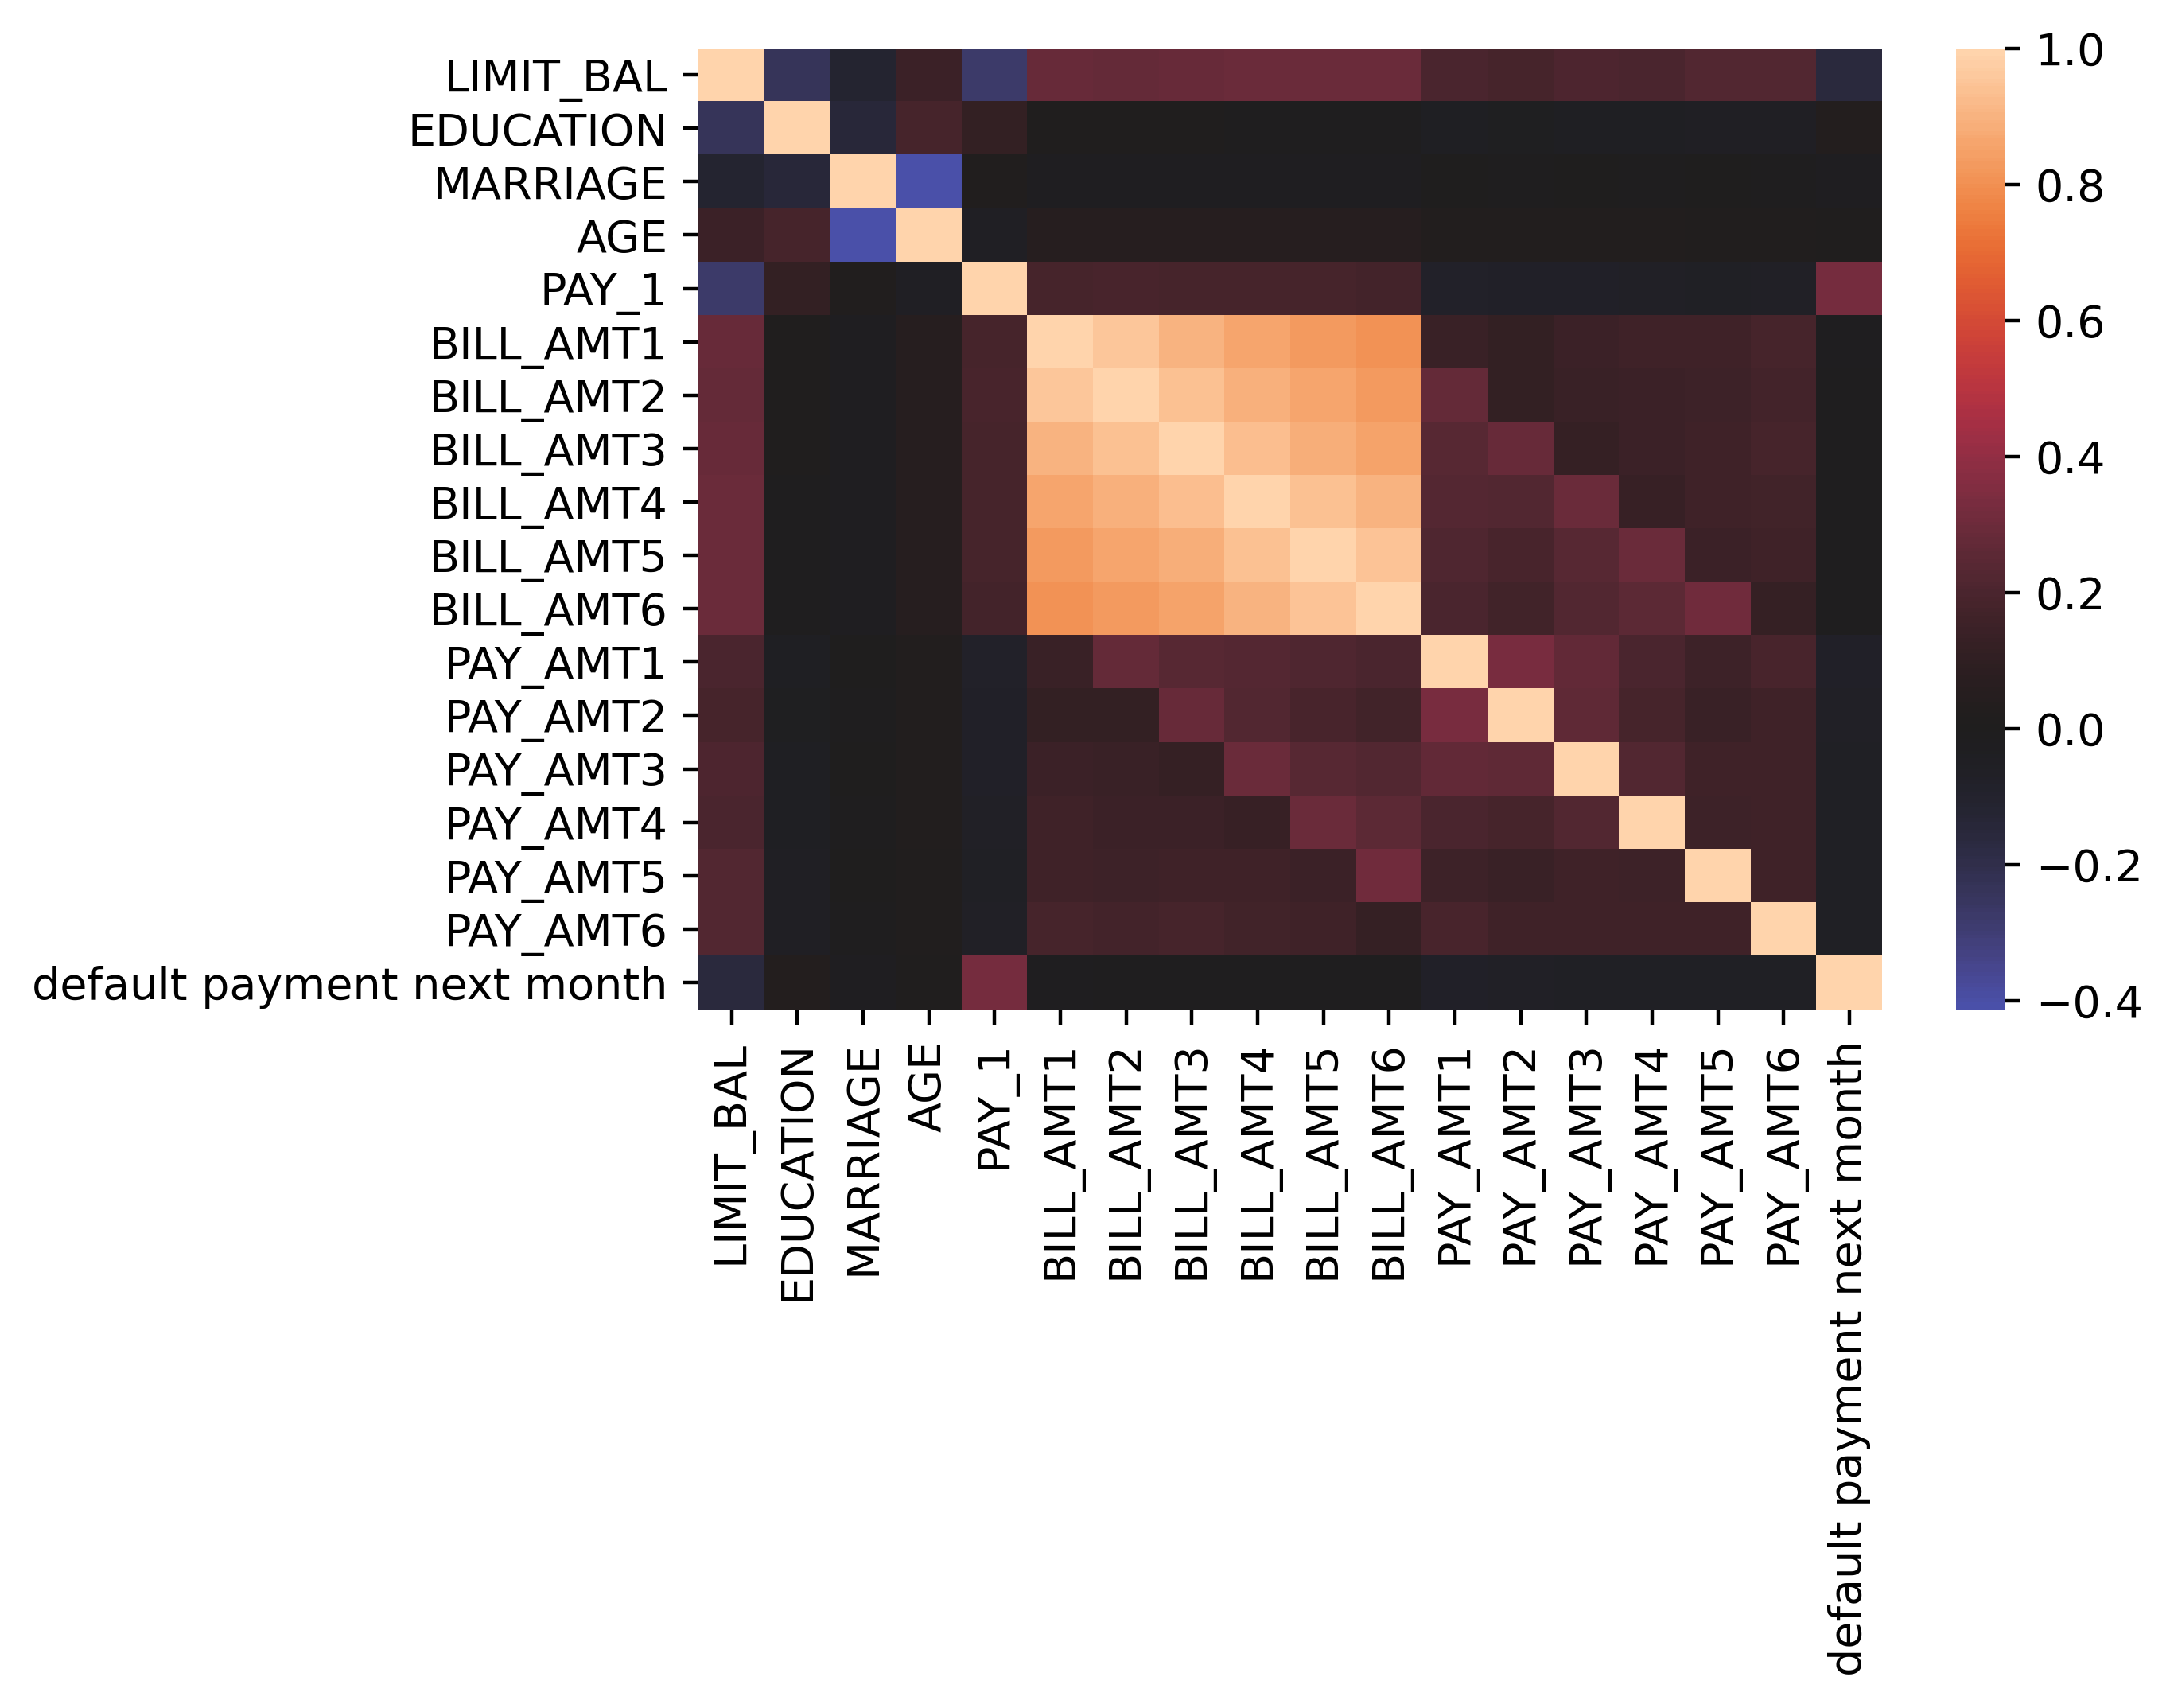

In [9]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [10]:
from sklearn.datasets import make_regression

In [11]:
X_syn_lin, y_syn_lin = make_regression(n_samples=100, n_features=1, n_informative=1,
                       n_targets=1, bias=0.0, effective_rank=None,
                       tail_strength=0.5, noise=10.0, shuffle=True,
                       coef=False, random_state=24)

In [12]:
from scipy.stats import linregress

In [13]:
m, b, r, p, std = linregress(X_syn_lin.reshape(len(X_syn_lin),), y_syn_lin)

In [14]:
x_regression = np.array([-3, 3])
y_regression = m*x_regression + b

Text(0.5, 1.0, 'Synthetic linear data and line of best fit')

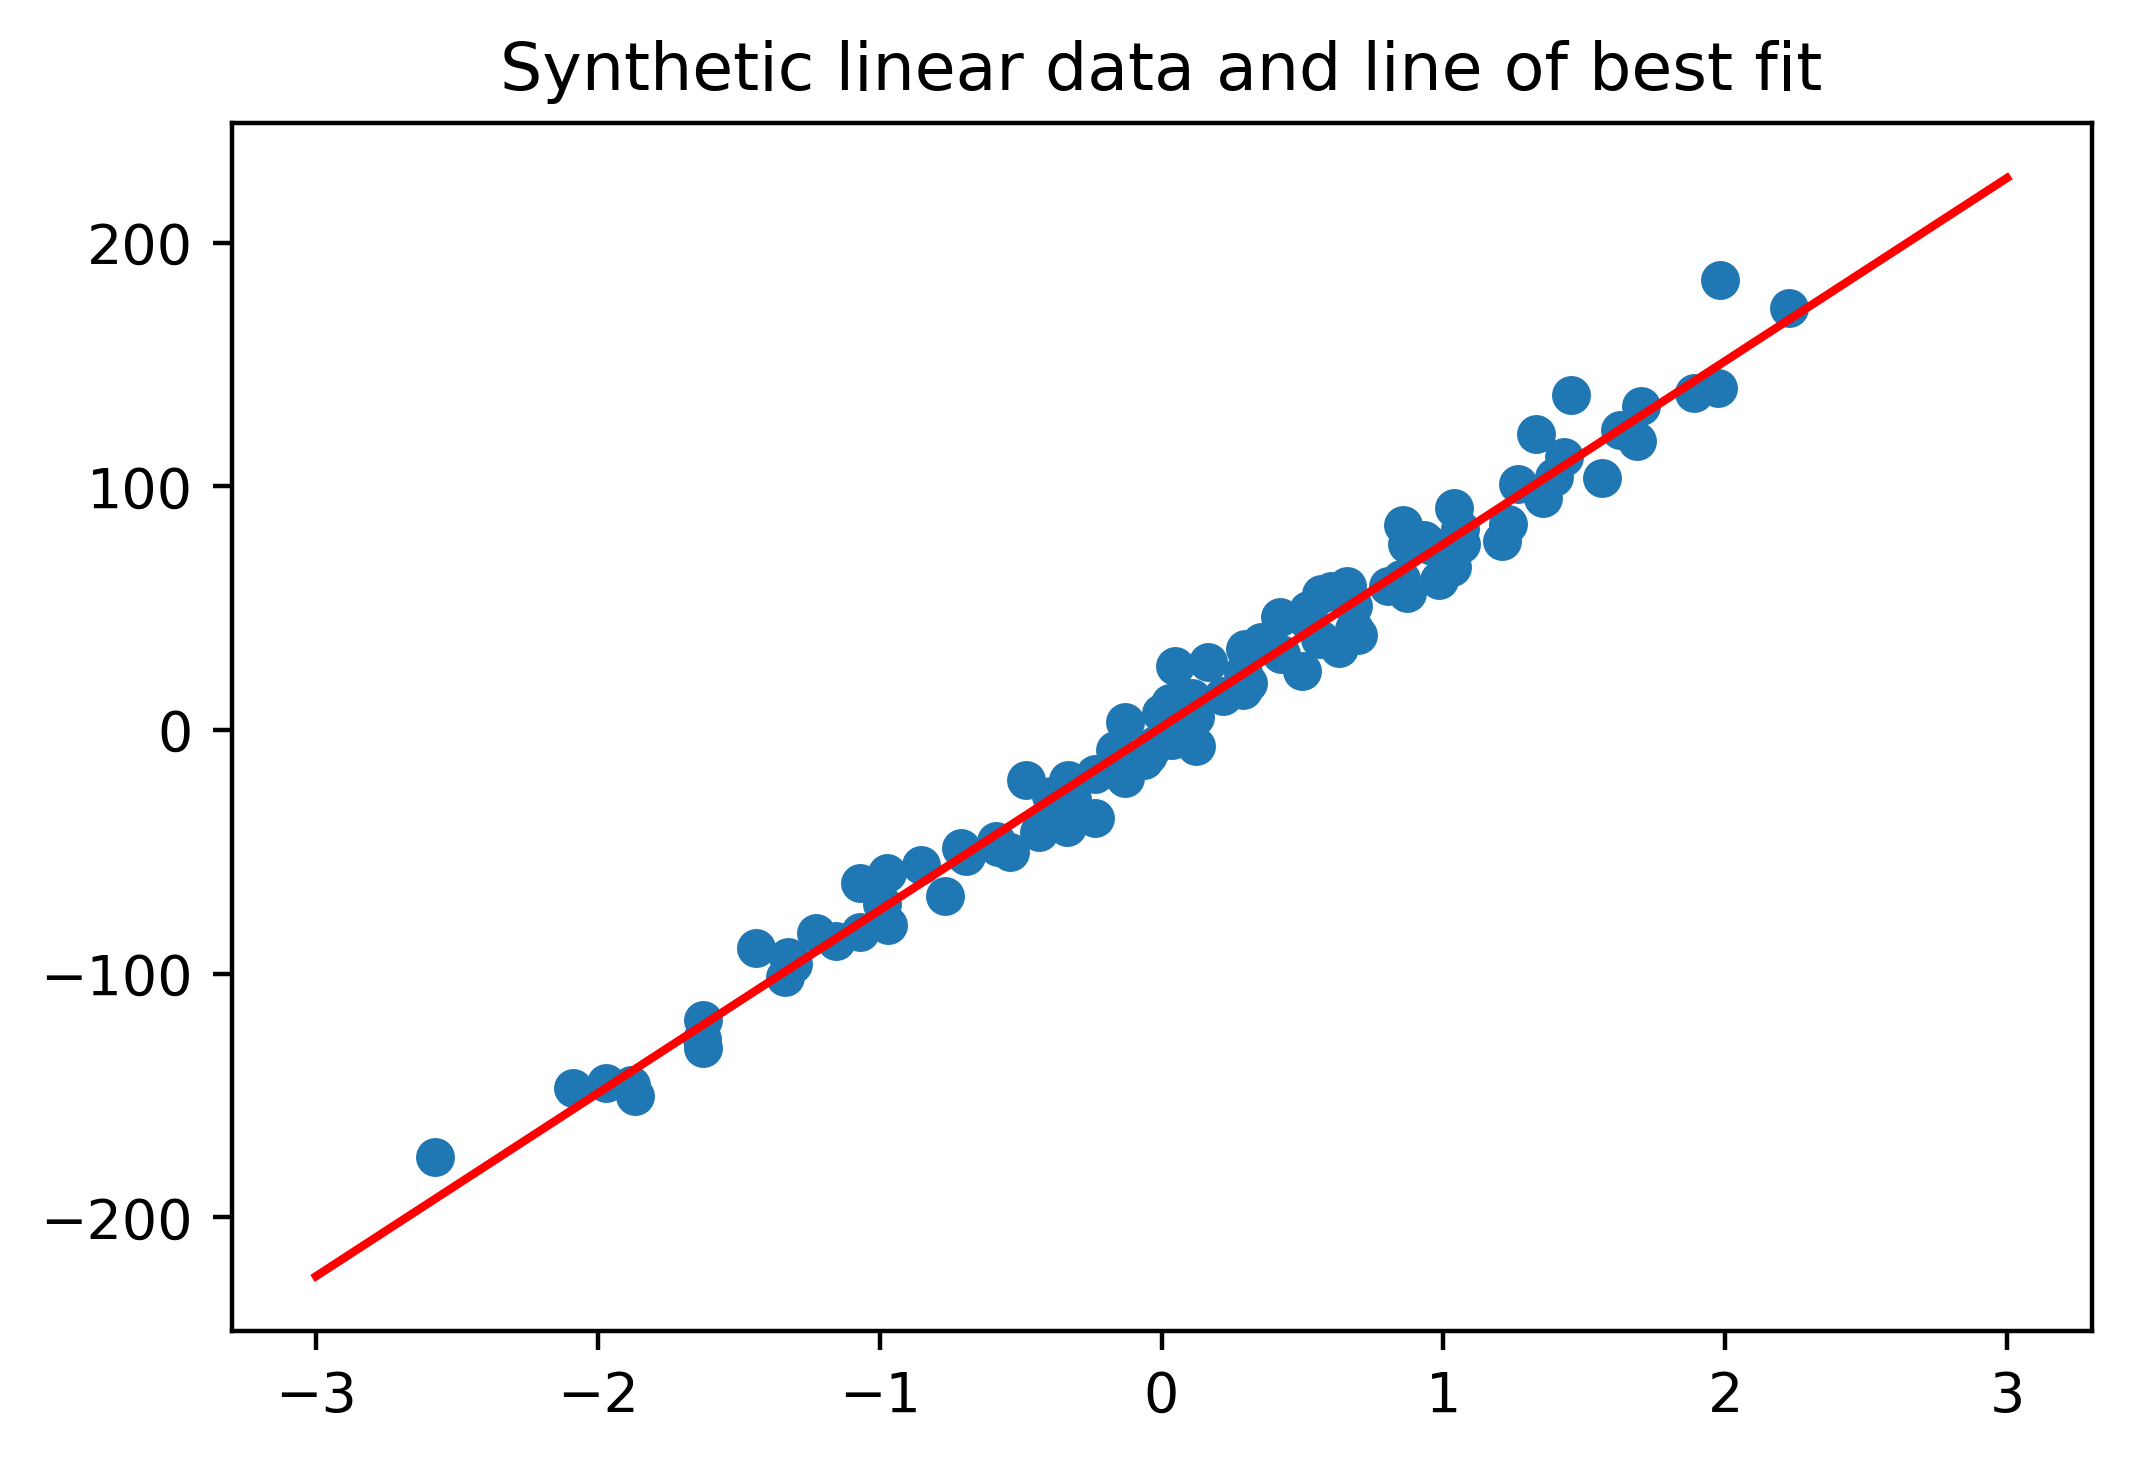

In [15]:
plt.scatter(X_syn_lin, y_syn_lin)
plt.plot(x_regression, y_regression, 'r-')
plt.title('Synthetic linear data and line of best fit')

In [16]:
X_syn_lin = np.append(X_syn_lin, 10)
y_syn_lin = np.append(y_syn_lin, 200)

In [17]:
m, b, r, p, std = linregress(X_syn_lin.reshape(len(X_syn_lin),), y_syn_lin)

In [18]:
x_regression = np.array([-3, 10])
y_regression = m*x_regression + b

Text(0.5, 1.0, 'Synthetic linear data with outlier and line of best fit')

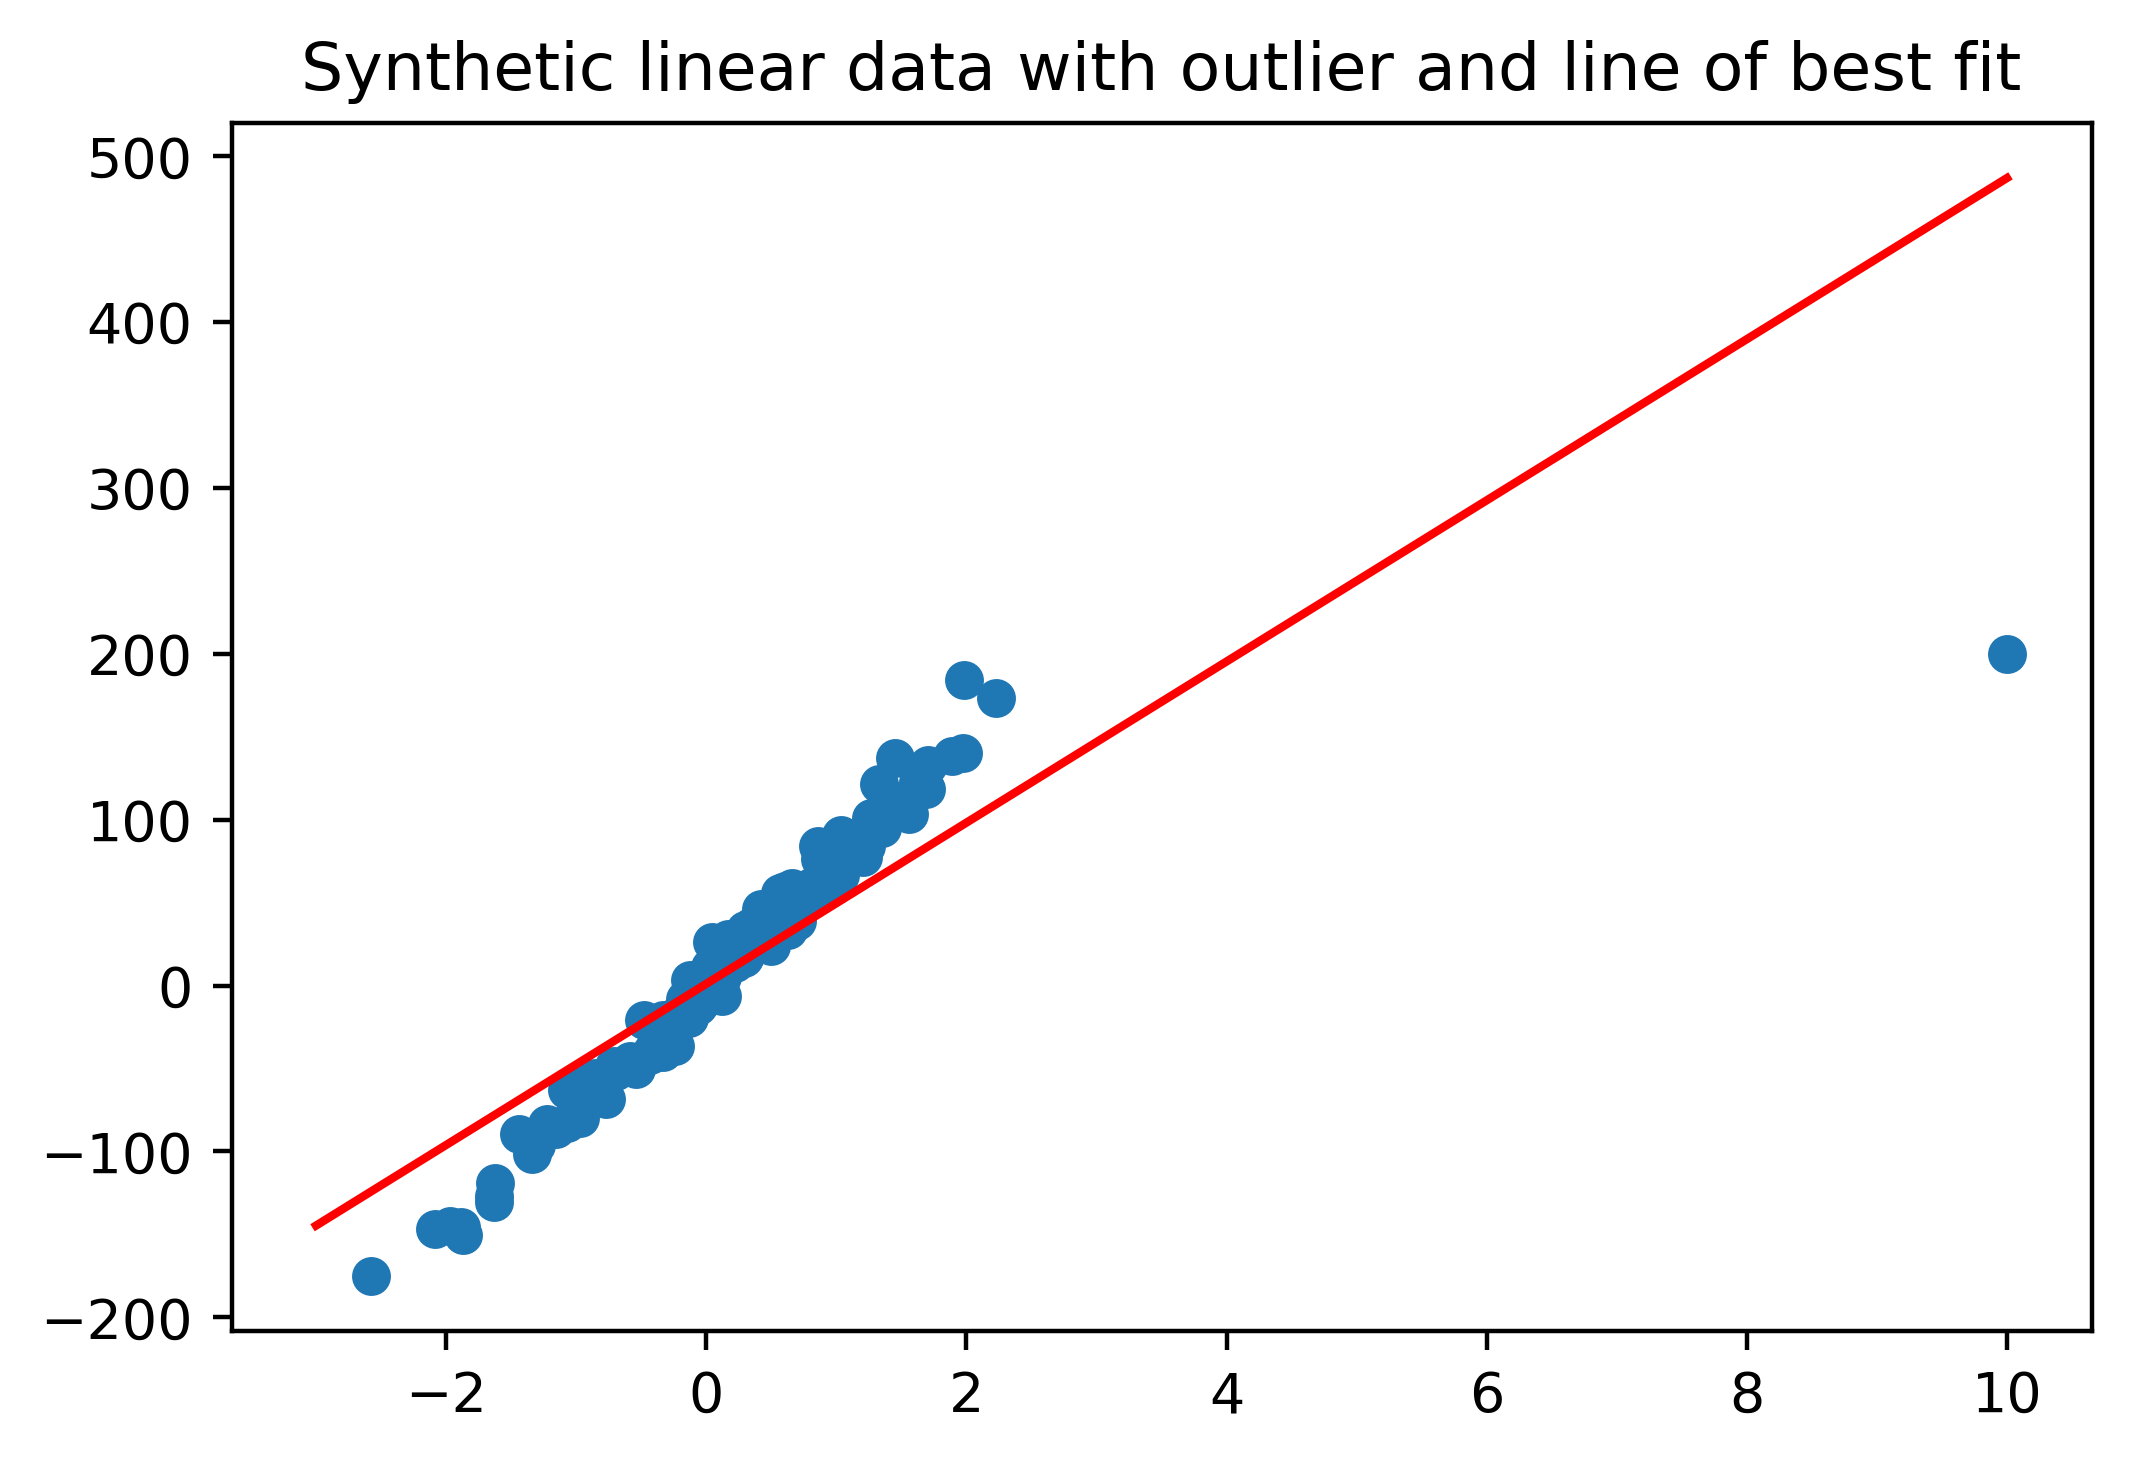

In [19]:
plt.scatter(X_syn_lin, y_syn_lin)
plt.plot(x_regression, y_regression, 'r-')
plt.title('Synthetic linear data with outlier and line of best fit')

# The Motivation for Regularization: the Bias-Variance Trade-off
Generate quadratic data with random noise to illustrate this.

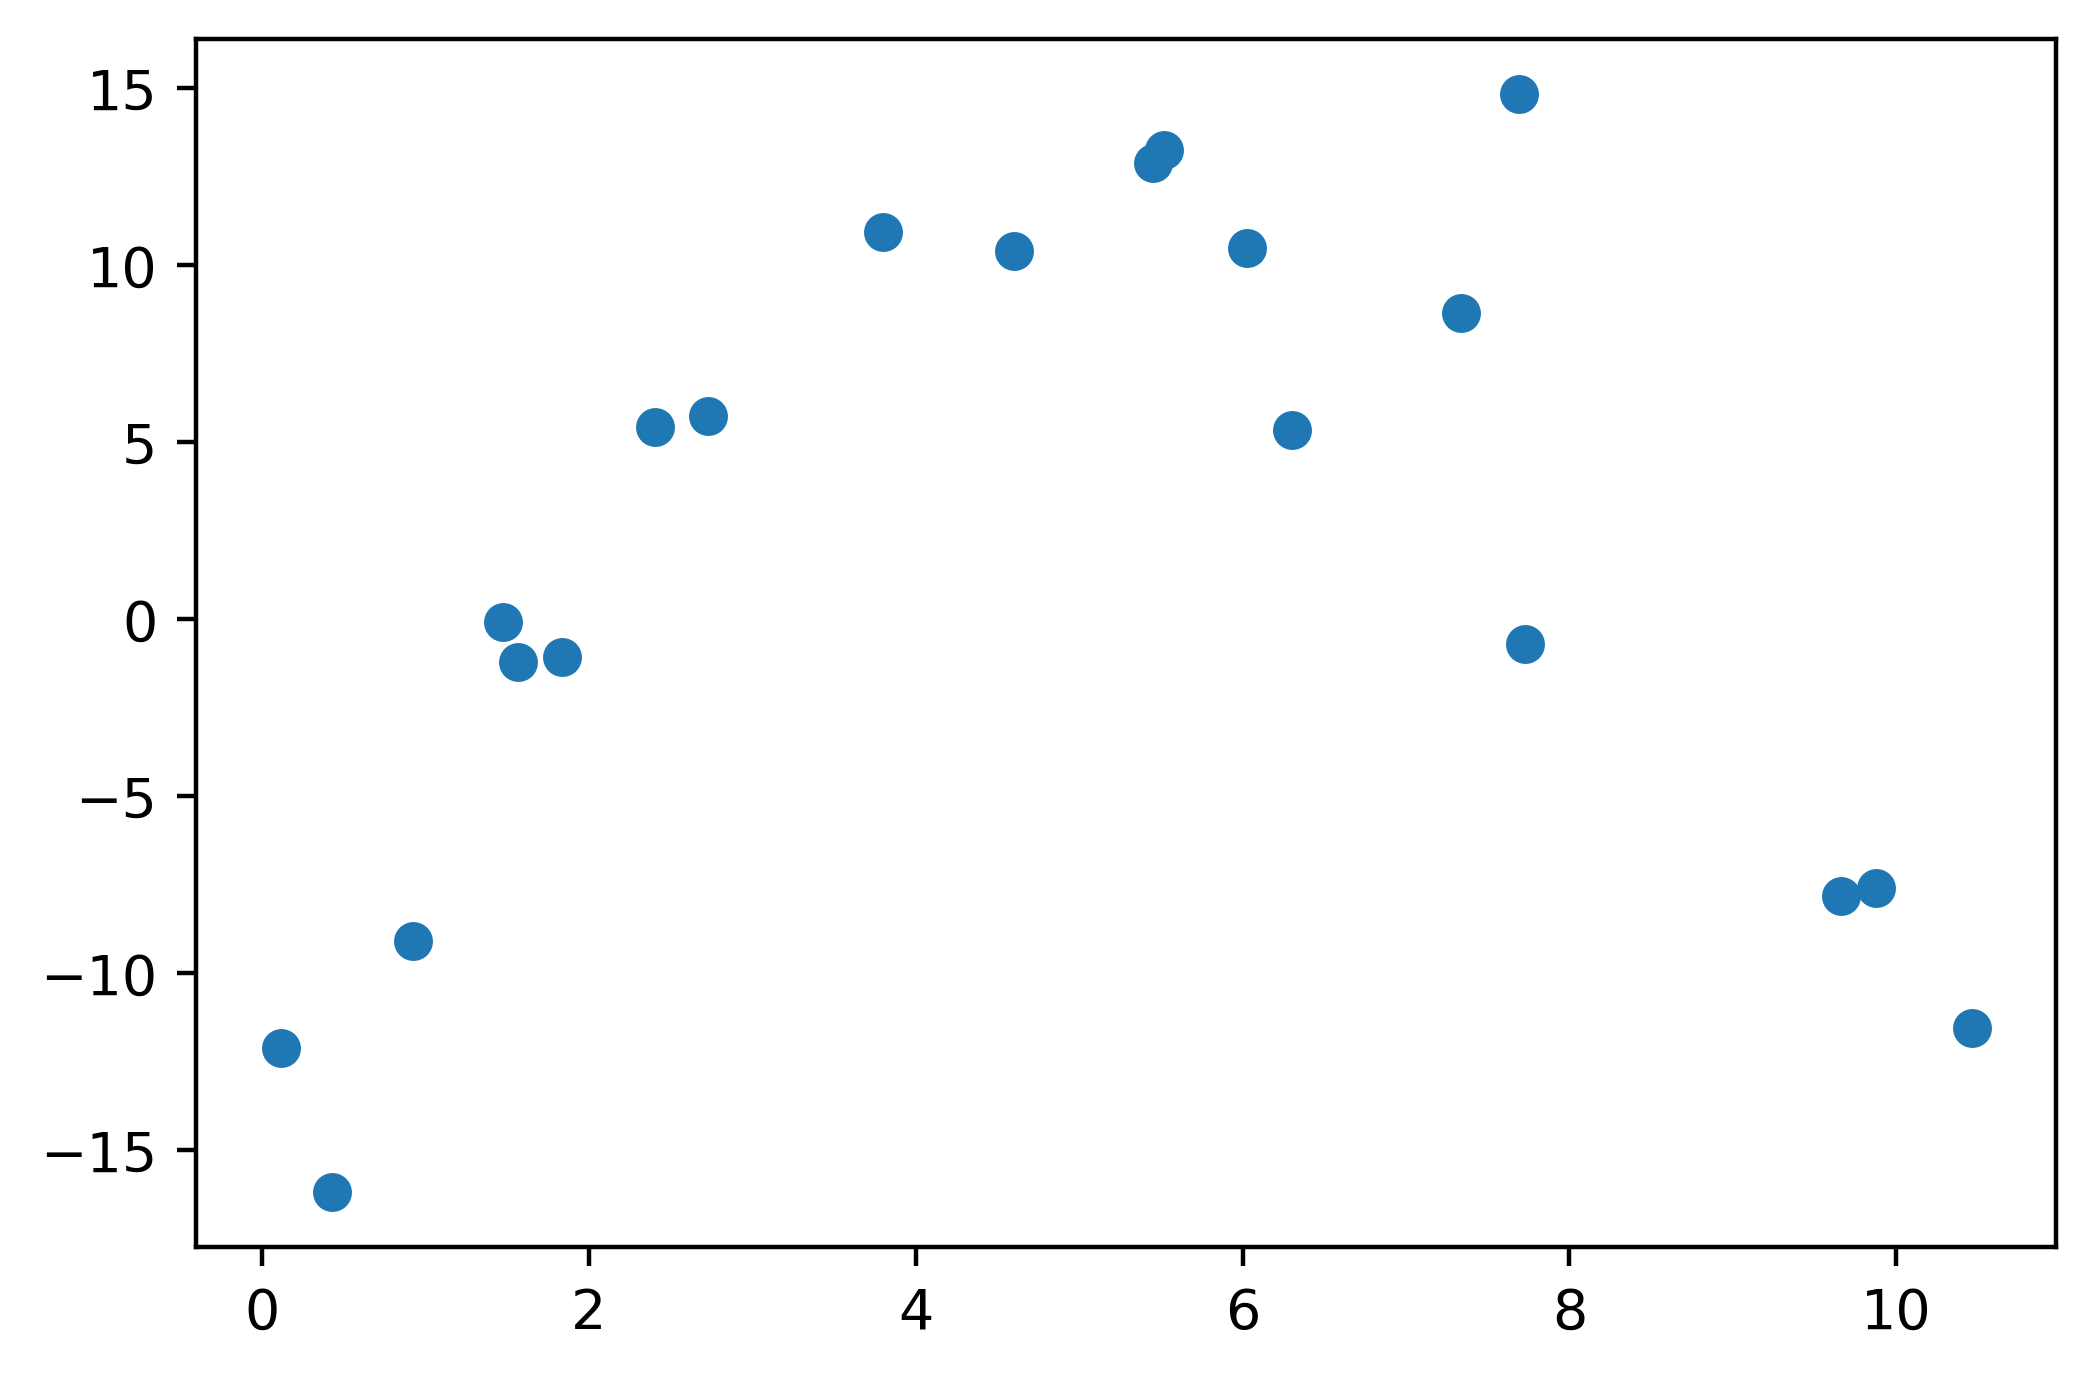

In [20]:
np.random.seed(seed=9)
n_points = 20
X = np.random.uniform(0, 11, n_points)
X = np.sort(X)
Y = (-X+2) * (X-9) + np.random.normal(0, 3, n_points)
plt.scatter(X, Y)

In [21]:
lin_fit = np.polyfit(X, Y, 1)

Function to take in the polynomial coefficients and produce the y values

In [22]:
def poly_fun(X, p):
    Y = np.zeros_like(X)
    power = len(p)-1
    for coefficient in p:
        Y = Y + coefficient*X**power
        power = power - 1
    return Y

In [23]:
lin_fit

array([ 0.44464616, -0.61869372])

In [24]:
poly_fun(X,lin_fit)

array([-0.56795261, -0.42917123, -0.2075489 ,  0.03588094,  0.07638692,
        0.19702737,  0.45030033,  0.59479584,  1.07117738,  1.42827491,
        1.80618691,  1.83602902,  2.06083994,  2.18273629,  2.64318106,
        2.8007159 ,  2.81695454,  3.67843349,  3.77355591,  4.03257388])

Plot the models over a more continuous range of values

In [25]:
curve_x = np.linspace(0,11,333)

In [26]:
cmap = mpl.cm.get_cmap('tab10')

(-20.0, 20.0)

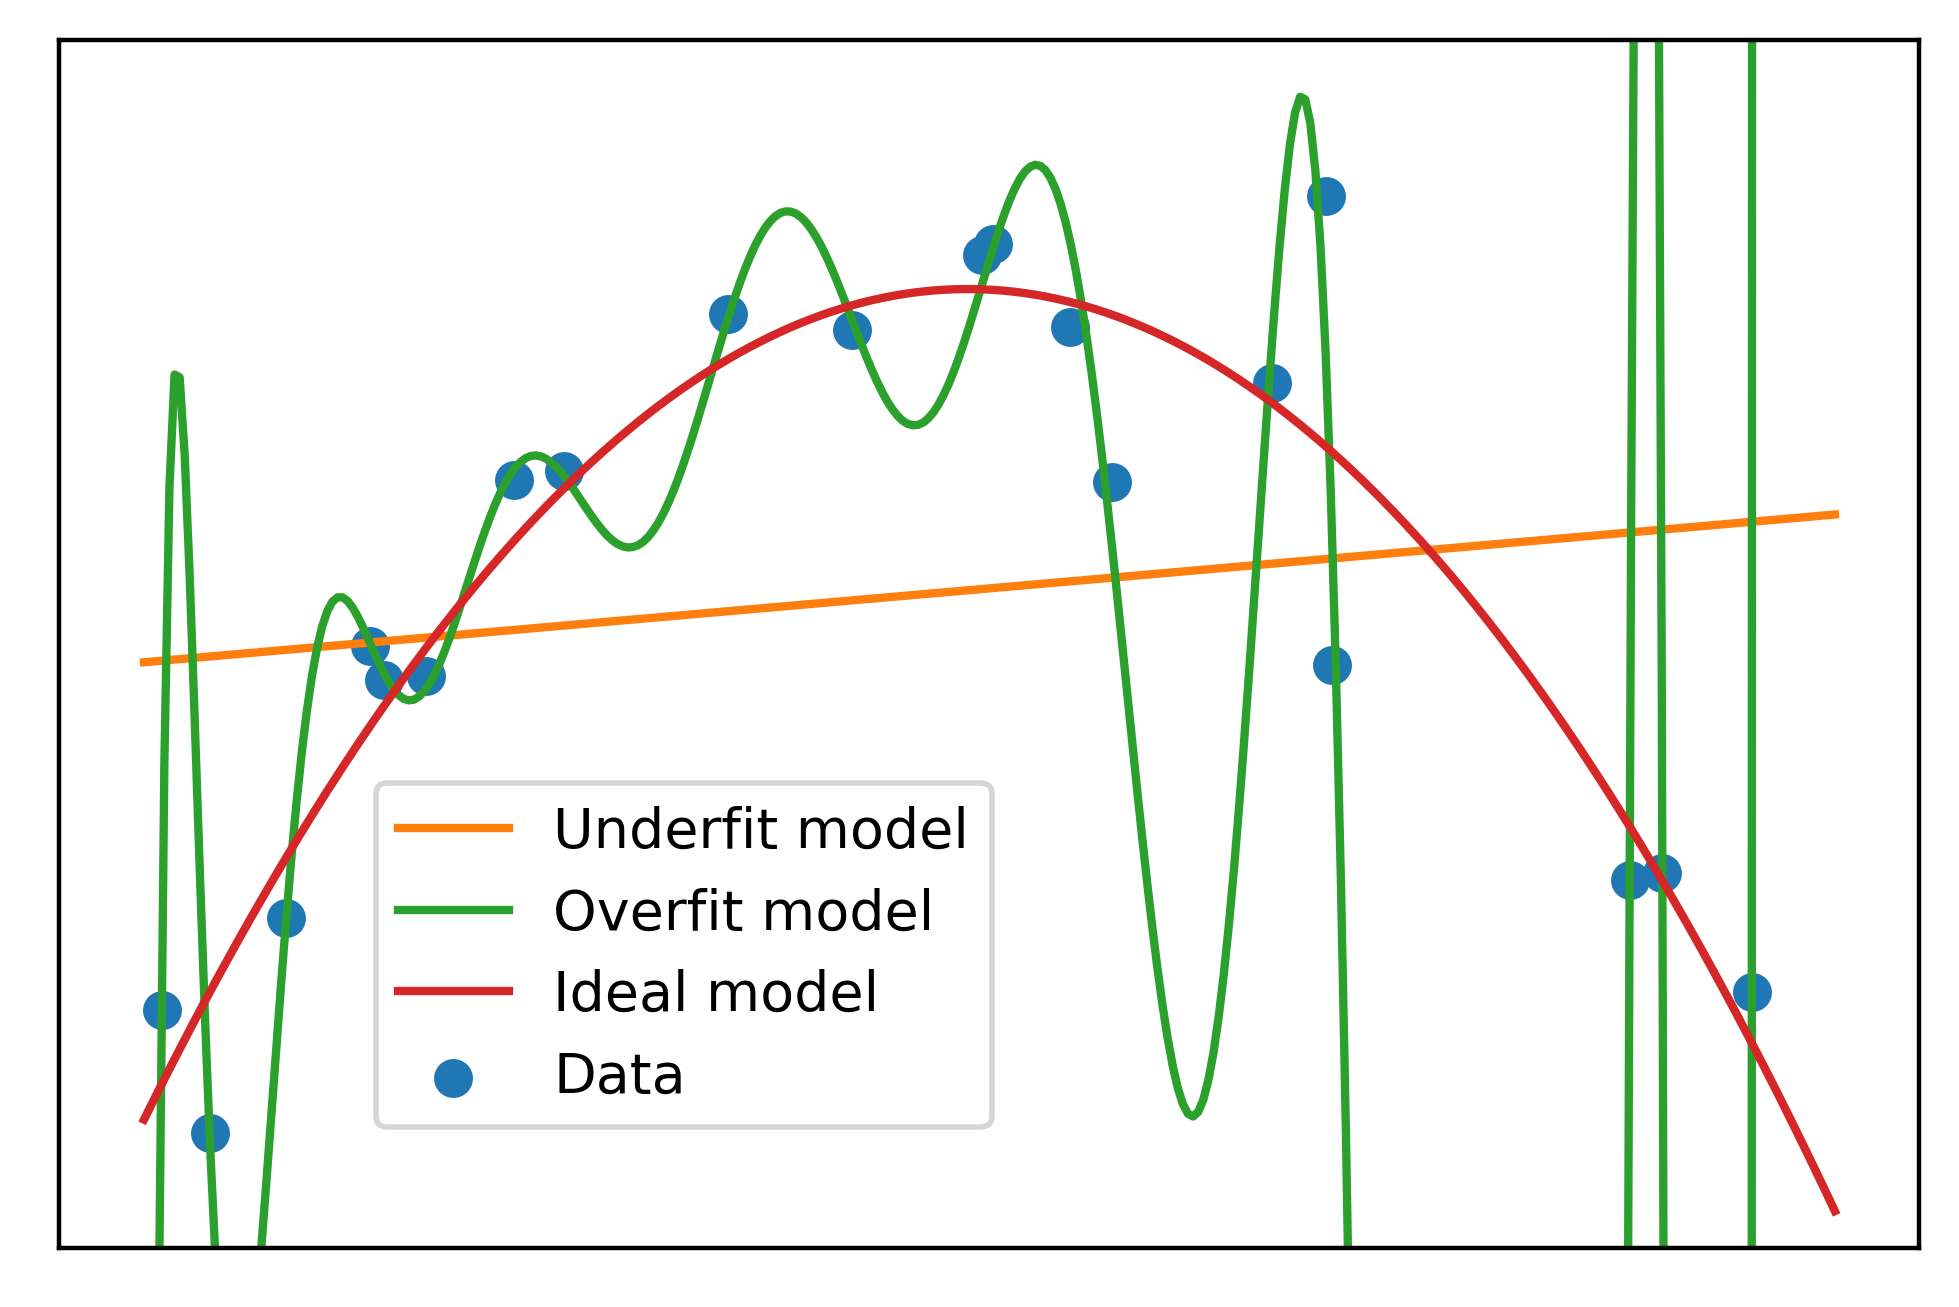

In [27]:
plt.scatter(X, Y, label='Data', color=cmap(0))
plt.plot(curve_x, poly_fun(curve_x,lin_fit), label='Underfit model', color=cmap(1))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 15)), label='Overfit model', color=cmap(2))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 2)), label='Ideal model', color=cmap(3))
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

# Exercise 17: Generating and Modeling Synthetic Classification Data

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [29]:
X_synthetic, y_synthetic = \
make_classification(n_samples=1000, n_features=200, n_informative=3, n_redundant=10,
                    n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None,
                    flip_y=0.01, class_sep=0.8, hypercube=True, shift=0.0, scale=1.0,
                    shuffle=True, random_state=24)

In [30]:
print(X_synthetic.shape, y_synthetic.shape)
print(np.mean(y_synthetic))

(1000, 200) (1000,)
0.501


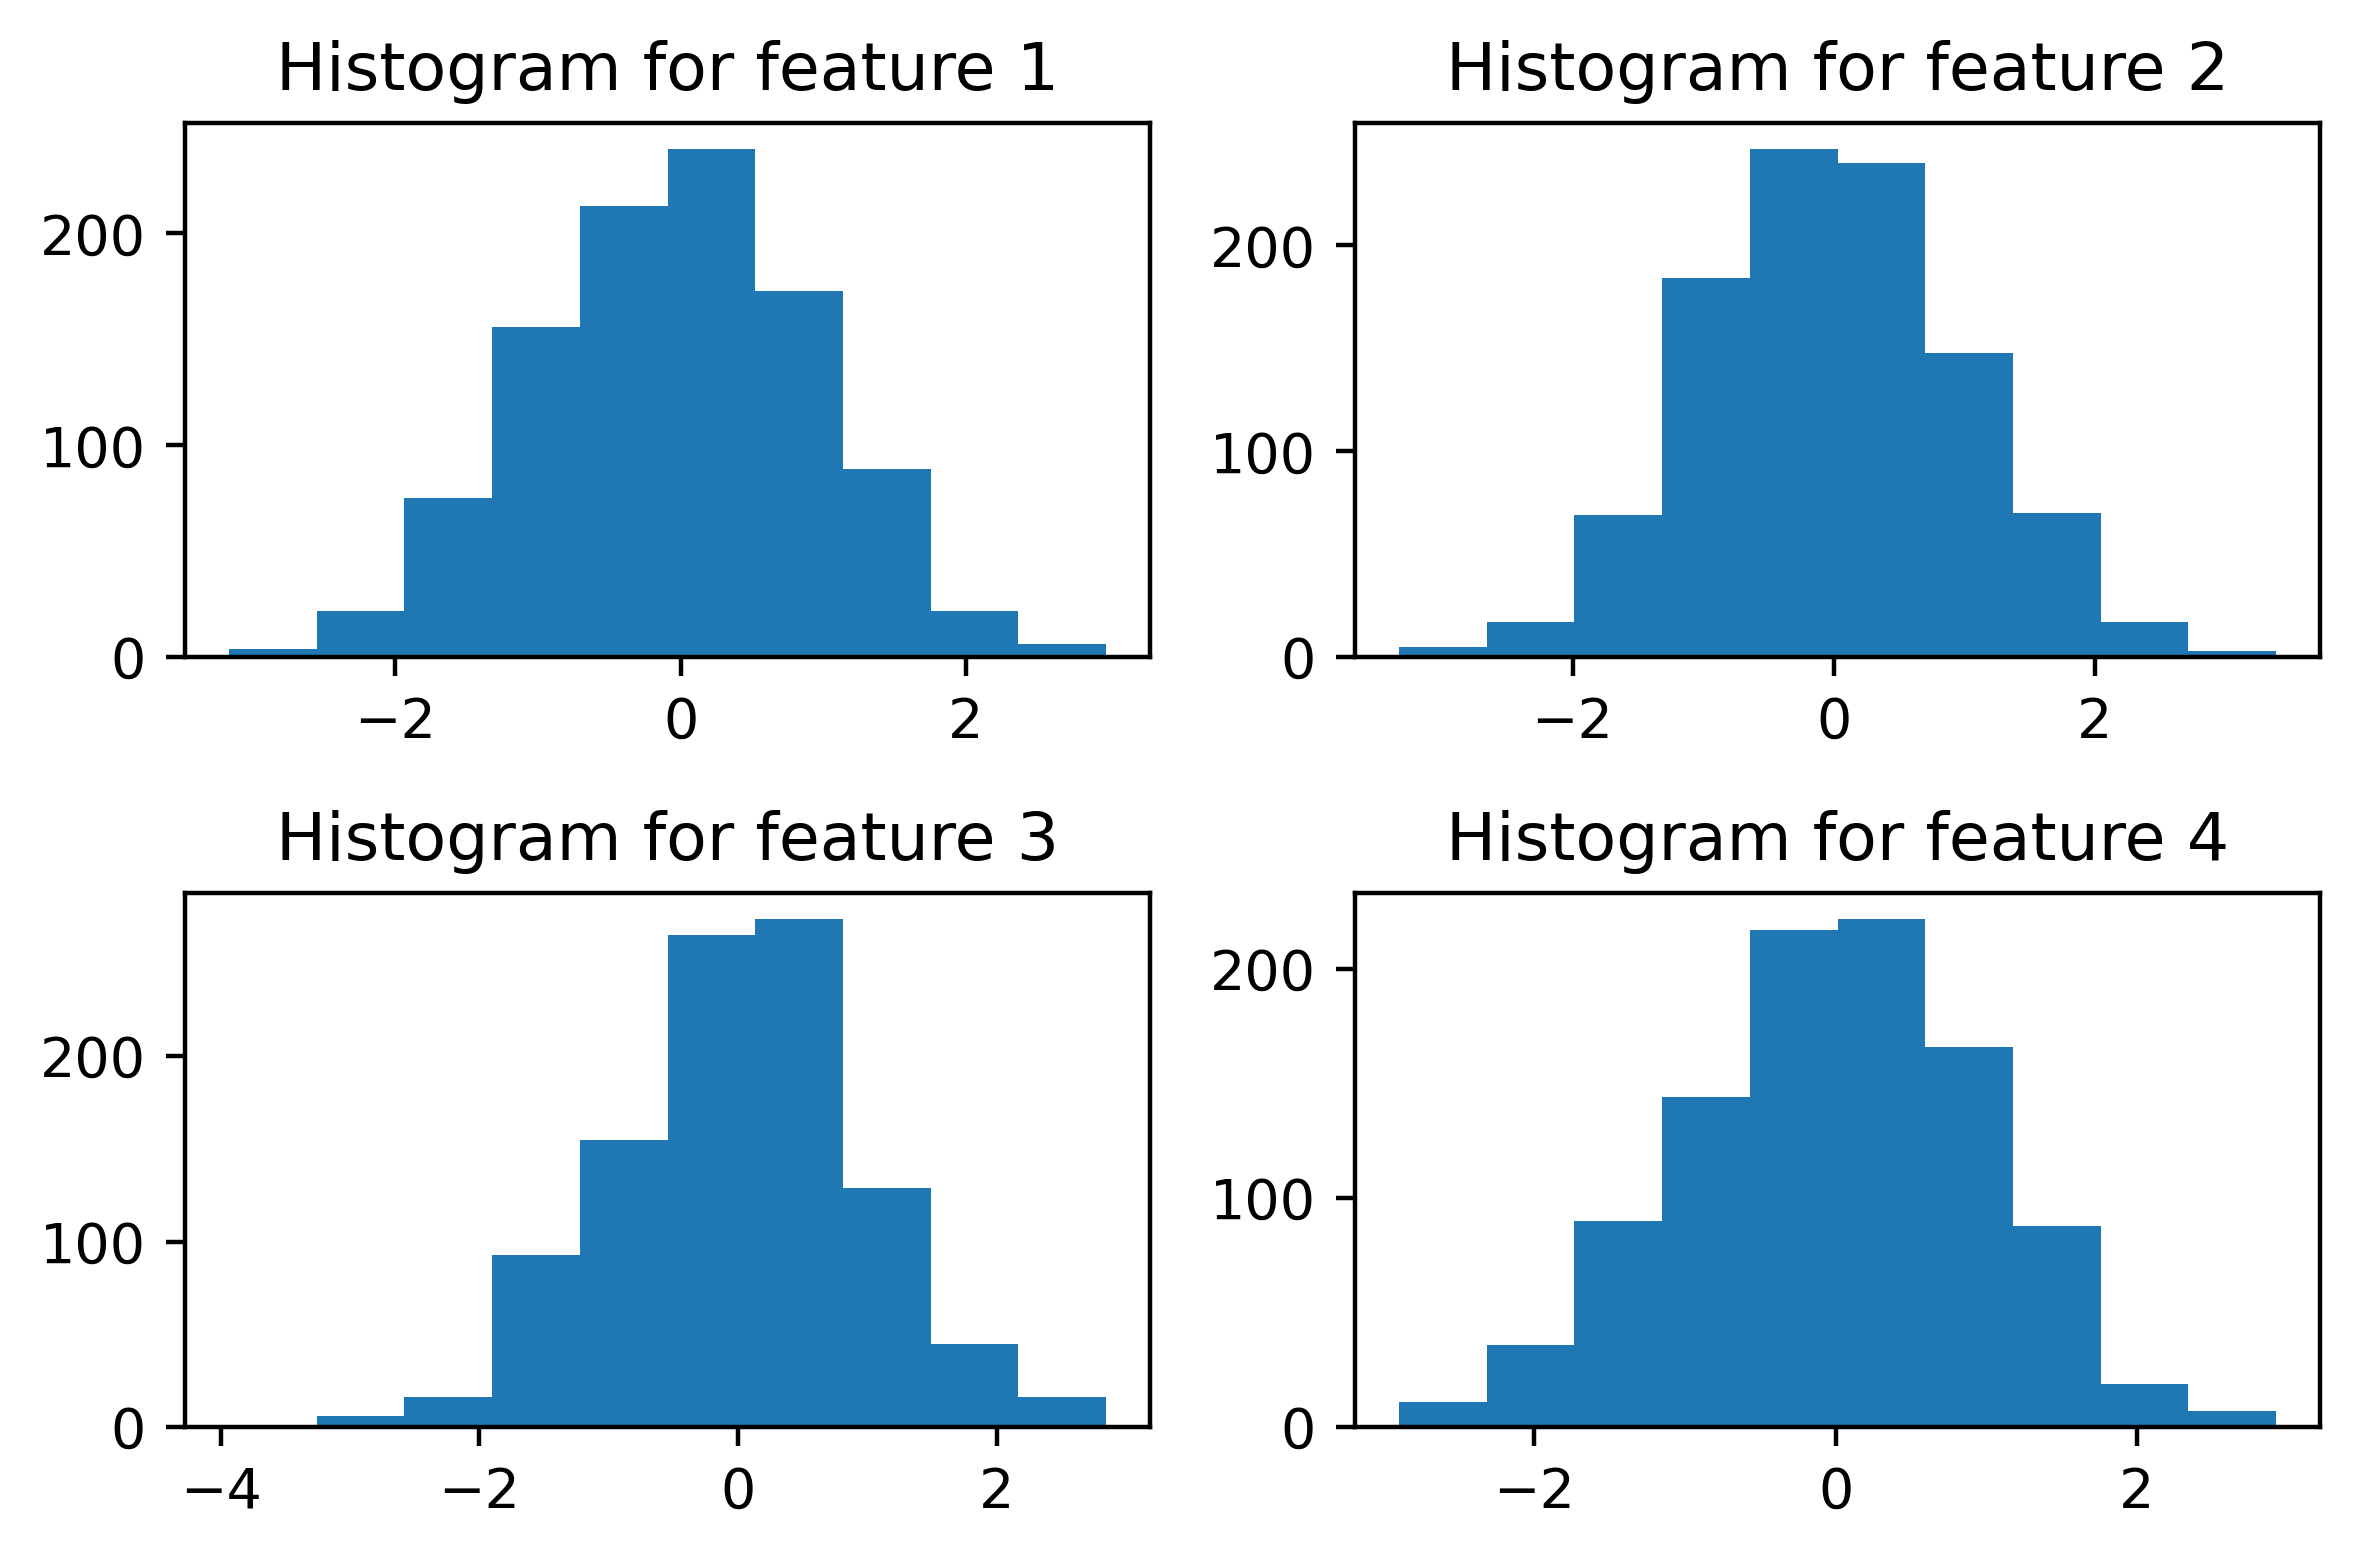

In [31]:
for plot_index in range(4):
    plt.subplot(2, 2, plot_index+1)
    plt.hist(X_synthetic[:, plot_index])
    plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [32]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
X_synthetic, y_synthetic,
test_size=0.2, random_state=24)

In [33]:
lr_syn = \
LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)

In [34]:
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [35]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)

In [36]:
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9420000000000001

In [37]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)

In [38]:
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8075807580758075

In [39]:
# lr_syn.coef_